# Excercises Electric Machinery Fundamentals
## Chapter 2

## Problem 2-8

**Note:** *You should first click on "`Cell` &rarr; `Run All`" in order that the plots get generated.*

In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


### Description
A 150-MVA 15/200-kV single-phase power transformer 
has a per-unit resistance of 1.2 percent 
and a perunit reactance of 5 percent (data taken from the transformer’s nameplate).
The magnetizing impedance is $j80$ per unit.

In [2]:
V_base =  15e3   # [V] primary voltage
S_base = 150e6   # [VA] apparent power
Req_0  =   0.012 # The per-unit resistance of power transformer
Xeq_0  =   0.05  # The per_unit reactance of power transformer
Xm_0   =  80.0   # The magnetizing impedance (per unit)

#### (a)

 * Find the equivalent circuit referred to the low-voltage side of this transformer.
 
#### (b)

 * Calculate the voltage regulation of this transformer for a full-load current at power factor of 0.8 lagging.
 
#### (c)

 * Calculate the copper and core losses in transformer at the conditions in (b).
 
#### (d)

Assume that the primary voltage of this transformer is a constant 15 kV.

 * Plot the secondary voltage as a function of load current for currents from no-load to full-load.
 * Repeat this process for power factors of 0.8 lagging, 1.0, and 0.8 leading.

### SOLUTION

#### (a)

The base impedance $Z_\text{base}$ of this transformer referred to the primary (low-voltage) side is 
$$Z_\text{base} = \frac{V_\text{base}^2}{S_\text{base}}$$

In [3]:
Z_base = V_base**2 / S_base  # [Ω]
print('Z_base = {:.1f} Ω'.format(Z_base)) 

Z_base = 1.5 Ω


So the resistance $R_\text{EQ}$, reactance $X_\text{EQ}$ and the magnetizing imoedance $X_M$ can be calculated:

In [4]:
Req = Req_0 * Z_base      # [Ω]
Xeq = Xeq_0 * Z_base * 1j # [Ω], Xeq is not supposed to be a real value here.
Xm  = Xm_0  * Z_base      # [Ω]

**The equivalent circuit referred to the low-voltage side of the transformer is:**

<img src="figs/Problem_2-08.jpg" width="50%">

In [5]:
print('R_EQ,P =  {:>5.3f} Ω'.format(Req))
print('X_EQ,P = j{:>5.3f} Ω'.format(Xeq.imag))
print('X_M    =  {:5.0f} Ω'.format(Xm))
print('R_C    =  not specified')

R_EQ,P =  0.018 Ω
X_EQ,P = j0.075 Ω
X_M    =    120 Ω
R_C    =  not specified


#### (b)

If the load on the secondary side of the transformer is 150 MVA at 0.8 PF lagging, and the referred
secondary voltage is 15 kV:

In [6]:
S_load = 150e6        # Load [VA]
VS = 15.0e3 + 0.0j    # [V]
PF_b = 0.8            # Lagging

Then the referred secondary current is
$$I'_S = \frac{S_\text{LOAD}}{V_S} = \frac{P_\text{LOAD}}{V_S PF} $$

In [7]:
Is = S_load / abs(VS)                        # The absolute value of I_S [A]
Is_angle = - arccos(PF_b)                    # The angle of I_S [rad]
IS = Is*cos(Is_angle) + Is*sin(Is_angle)*1j
print('I_s = {:.0f} A ∠{:.2f}°'.format(
                abs(IS), Is_angle/pi*180))  # Turn the angle from radian into degree

I_s = 10000 A ∠-36.87°


The voltage on the primary side of the transformer is:
$$V'_P = V'_S + I'_S Z_{\text{EQ}_P}$$

In [8]:
VP_b = VS + IS * (Req + Xeq)                 # [V]
VP_b_angle = arctan(imag(VP_b)/real(VP_b))
print('V_P = {:.0f} V ∠{:.2f}°'.format(
            abs(VP_b), VP_b_angle/pi*180)) # return the calculated angle in degrees      

V_P = 15602 V ∠1.81°


**Therefore the voltage regulation of the transformer is:**

In [9]:
VR = (abs(VP_b) - abs(VS)) / (abs(VS)) * 100      # [%]
print('VR = {:.2f} %'.format(VR))
print('===========')

VR = 4.01 %


#### (c)

**The copper loss can be calculated with:**
$$P_{Cu} = (I_S)^2 R_{EQ}$$

In [10]:
P_Cu = abs(IS)**2 * Req
print('P_Cu = {:.1f} kW'.format(P_Cu/1000))
print('================')

P_Cu = 1800.0 kW


The core loss couldn't been found due to the unspecified parameter $R_C$

#### (d)

This problem is repetitive in nature, and is ideally suited for Python. 
A program to calculate the secondary voltage of the transformer as a function of load is shown below:

Define the values for the transformer:

(the equivalent R and X are defined above)

In [11]:
amps = linspace(0, 12500 ,101)  # Current values [A]
VP_d = 15000                    # Primary voltage [V]

Calculate the current calues for the three power factors.

The first array of I contains the lagging currents, the second array contains the unity currents, and the third array contains the leading currents.

In [12]:
I = amps * array ([[0.8 - 0.6j],   # Lagging
                   [1.0],          # Unity
                   [0.8 + 0.6j]])  # Leading

Calculate VS referred to the primary side for each current and power factor.

In [13]:
aVS = VP_d - (Req*I + Xeq*I)

Refer the secondary voltage back to the secondary side using the turns ratio.

In [14]:
VS = aVS * (200/15)

**Plot the secondary voltage (in kV!) versus load:**

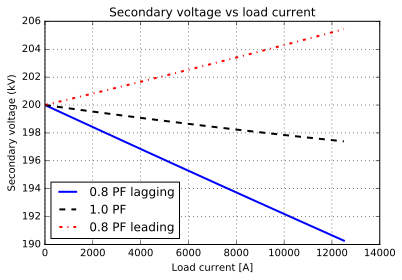

In [15]:
title('Secondary voltage vs load current')
xlabel('Load current [A]')
ylabel('Secondary voltage (kV)')
plot(amps,abs(VS[0,]/1000), 'b-', linewidth = 2)
plot(amps,abs(VS[1,]/1000), 'k--',linewidth = 2)
plot(amps,abs(VS[2,]/1000), 'r-.',linewidth = 2)
legend(('0.8 PF lagging', '1.0 PF', '0.8 PF leading'), loc=3);
grid()